# Using Interact

The `interact` function (`ipywidgets.interact`) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython's widgets.

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

<div class="alert alert-success">
As of Jupyter 4.0, the widgets in this notebook won't show up on http://nbviewer.ipython.org. To view the widgets and interact with them, you will need to download this notebook and run it with a Jupyter Notebook server.

</div>

## Basic `interact`

At the most basic level, `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use `interact`, you need to define a function that you want to explore. Here is a function that prints its only argument `x`.

In [2]:
def f(x):
    return x

When you pass this function as the first argument to `interact` along with an integer keyword argument (`x=10`), a slider is generated and bound to the function parameter.

In [3]:
interact(f, x=10);

10

When you move the slider, the function is called, which prints the current value of `x`.

If you pass `True` or `False`, `interact` will generate a checkbox:

In [4]:
interact(f, x=True);

True

If you pass a string, `interact` will generate a text area.

In [5]:
interact(f, x='Hi there!');

'Hi there!'

`interact` can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, `interact` also works with functions that have multiple arguments.

In [6]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

(True, 1.0)

## Fixing arguments using `fixed`

There are times when you may want to explore a function using `interact`, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the `fixed` function.

In [7]:
def h(p, q):
    return (p, q)

When we call `interact`, we pass `fixed(20)` for q to hold it fixed at a value of `20`.

In [8]:
interact(h, p=5, q=fixed(20));

(5, 20)

Notice that a slider is only produced for `p` as the value of `q` is fixed.

## Widget abbreviations

When you pass an integer-valued keyword argument of `10` (`x=10`) to `interact`, it generates an integer-valued slider control with a range of $[-10,+3\times10]$. In this case, `10` is an *abbreviation* for an actual slider widget:

```python
IntSlider(min=-10,max=30,step=1,value=10)
```

In fact, we can get the same result if we pass this `IntSlider` as the keyword argument for `x`:

In [9]:
interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));

10

This examples clarifies how `interact` proceses its keyword arguments:

1. If the keyword argument is a `Widget` instance with a `value` attribute, that widget is used. Any widget with a `value` attribute can be used, even custom ones.
2. Otherwise, the value is treated as a *widget abbreviation* that is converted to a widget before it is used.

The following table gives an overview of different widget abbreviations:

<table class="table table-condensed table-bordered">
  <tr><td><strong>Keyword argument</strong></td><td><strong>Widget</strong></td></tr>  
  <tr><td>`True` or `False`</td><td>Checkbox</td></tr>  
  <tr><td>`'Hi there'`</td><td>Text</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if integers are passed</td><td>IntSlider</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if floats are passed</td><td>FloatSlider</td></tr>
  <tr><td>`('orange','apple')` or `{'one':1,'two':2}`</td><td>Dropdown</td></tr>
</table>

You have seen how the checkbox and textarea widgets work above. Here, more details about the different abbreviations for sliders and dropdowns are given.

If a 2-tuple of integers is passed `(min,max)`, an integer-valued slider is produced with those minimum and maximum values (inclusively). In this case, the default step size of `1` is used.

In [10]:
interact(f, x=(0,4));

2

If a 3-tuple of integers is passed `(min,max,step)`, the step size can also be set.

In [11]:
interact(f, x=(0,8,2));

4

A float-valued slider is produced if the elements of the tuples are floats. Here the minimum is `0.0`, the maximum is `10.0` and step size is `0.1` (the default).

In [12]:
interact(f, x=(0.0,10.0));

5.0

The step size can be changed by passing a third element in the tuple.

In [13]:
interact(f, x=(0.0,10.0,0.01));

4.99

For both integer and float-valued sliders, you can pick the initial value of the widget by passing a default keyword argument to the underlying Python function. Here we set the initial value of a float slider to `5.5`.

In [14]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.5):
    return x

5.5

Dropdown menus are constructed by passing a tuple of strings. In this case, the strings are both used as the names in the dropdown menu UI and passed to the underlying Python function.

In [15]:
interact(f, x=('apples','oranges'));

'oranges'

If you want a dropdown menu that passes non-string values to the Python function, you can pass a dictionary. The keys in the dictionary are used for the names in the dropdown menu UI and the values are the arguments that are passed to the underlying Python function.

In [16]:
interact(f, x={'one': 10, 'two': 20});

20

## Using function annotations with `interact`

If you are using Python 3, you can also specify widget abbreviations using [function annotations](https://docs.python.org/3/tutorial/controlflow.html#function-annotations).

Define a function with a checkbox widget abbreviation for the argument `x`.

In [17]:
def f(x:True): # python 3 only
    return x

Then, because the widget abbreviation has already been defined, you can call `interact` with a single argument.

In [18]:
interact(f);

True

If you are running Python 2, function annotations can be defined using the `@annotate` function.

In [19]:
from IPython.utils.py3compat import annotate

In [20]:
@annotate(x=True)
def f(x):
    return x

In [21]:
interact(f);

True

## `interactive`

In addition to `interact`, IPython provides another function, `interactive`, that is useful when you want to reuse the widgets that are produced or access the data that is bound to the UI controls.

Here is a function that returns the sum of its two arguments.

In [22]:
def f(a, b):
    return a+b

Unlike `interact`, `interactive` returns a `Widget` instance rather than immediately displaying the widget.

In [23]:
w = interactive(f, a=10, b=20)

The widget is a `Box`, which is a container for other widgets.

In [24]:
type(w)

ipywidgets.widgets.widget_box.Box

The children of the `Box` are two integer-valued sliders produced by the widget abbreviations above.

In [25]:
w.children

(<ipywidgets.widgets.widget_int.IntSlider at 0x7fb3941d6b70>,
 <ipywidgets.widgets.widget_int.IntSlider at 0x7fb3941d6e10>)

To actually display the widgets, you can use IPython's `display` function.

In [26]:
from IPython.display import display
display(w)

50

At this point, the UI controls work just like they would if `interact` had been used. You can manipulate them interactively and the function will be called. However, the widget instance returned by `interactive` also give you access to the current keyword arguments and return value of the underlying Python function.

Here are the current keyword arguments. If you rerun this cell after manipulating the sliders, the values will have changed.

In [27]:
w.kwargs

{'a': 10, 'b': 20}

Here is the current return value of the function.

In [28]:
w.result

30

AttributeError: 'PolarAxesSubplot' object has no attribute 'polar'

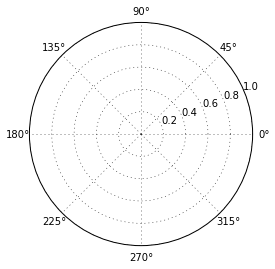

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

slider1 = FloatSlider(description='magnitude', min=0, max=10, step=0.1)
slider2 = FloatSlider(description='phase', min=0, max=4*np.pi, step=0.1)
fig = plt.figure()


phase = 1.0
magnitude = 1.8

ax = plt.subplot(111, projection='polar')
ax.polar([0.0,phase], [0.0,magnitude], color='r', linewidth=3)

plt.show()
def update_plot():
    magnitude = slider1.value
    phase = slider2.value
    x = np.arange(0, 10, 0.5)
    y = magnitude*np.sin(x+phase)
    
    ax.plot(phase, magnitude)

    
    #clear_output(True)

#slider1.on_trait_change(update_plot, 'value')
#slider2.on_trait_change(update_plot, 'value')

#display(slider1, slider2)
#update_plot()

In [38]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

Button clicked.
Button clicked.
Button clicked.
Button clicked.


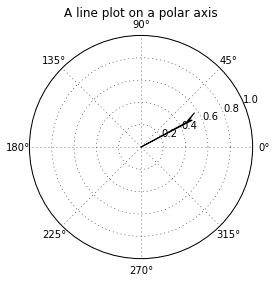

In [80]:
import numpy as np
import matplotlib.pyplot as plt

phase = 1.0
magnitude = 1.8

r = np.array([0,magnitude])
theta = np.array([0,phase])

ax = plt.subplot(111, projection='polar')
#ax.plot(theta, r, color='r', linewidth=3)
ax.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.set_rmax(1.0)
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()